# Ecn 19 Group Data analysis
## Introduction
Ecn 19 means economics students that graduated in the year 2019 from the economics department. The group consists of students and information is passed across the group. The dataset was exported from whatsapp as flat text file which consists of 1169 observations and four columns.

In [1]:
#Importing the neccesary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime

In [34]:
#importing and reading a text file
filename = ('C:\\Users\\sodiq\\Downloads\\Ecn19.txt')
file = open(filename,encoding='utf-8') #open a connection to the file
text = file.read() # skip the column names
data = text.splitlines()
file.close() #close the file
print(data)

['7/15/16, 10:12:42 AM ECN 19: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.', '7/15/16, 10:12:42 AM \u200eGroup creator created this group', '7/15/16, 10:12:42 AM \u200eYou were added', '11/6/21, 9:04:57 AM Emeka Ecn: For those writing masters entrance exams, kindly send a DM. Good morning', "11/6/21, 9:14:16 AM Alfa Fatai: For those of us who put on for unilag Masters and with economics focus. Let's read our principles of economics very well ( year 2 microeconomics and macroeconomics). That's all we need. ", 'I wish you all best of luck.', '11/6/21, 9:17:22 AM Alfa Fatai: Put in*', '11/6/21, 9:44:18 AM Zeus: Pq dey?', '11/6/21, 9:45:41 AM Pascal Ecn: Yep', '11/6/21, 9:46:49 AM Idris Ecn: Thanks o', 'But you get idea about finance?', '11/6/21, 9:46:53 AM Zeus: Na question wey you no Sabi you wan dey answer now?', '11/6/21, 9:47:03 AM Zeus: What of Operations', '11/6/21, 9:52:11 AM Pascal Ecn: Na school we

In [35]:
#processing the range length of the file
for i in range(len(data)):
    try:
        datetime.datetime.strptime(data[i].split(',')[0], '%m/%d/%y')
    except ValueError:
        data[i-1] = data[i-1] + ' ' + data[i]
        data[i] = 'NA'
        
for i in range(len(data)):
    if data[i].split(' ')[0] == 'NA':
         data[i] = 'NA'
        
while True:
    try:
        data.remove('NA')
    except ValueError:
        break
        
len(data)

1169

In [36]:
#checking how the data looks like
data

['7/15/16, 10:12:42 AM ECN 19: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.',
 '7/15/16, 10:12:42 AM \u200eGroup creator created this group',
 '7/15/16, 10:12:42 AM \u200eYou were added',
 '11/6/21, 9:04:57 AM Emeka Ecn: For those writing masters entrance exams, kindly send a DM. Good morning',
 "11/6/21, 9:14:16 AM Alfa Fatai: For those of us who put on for unilag Masters and with economics focus. Let's read our principles of economics very well ( year 2 microeconomics and macroeconomics). That's all we need.  I wish you all best of luck.",
 '11/6/21, 9:17:22 AM Alfa Fatai: Put in*',
 '11/6/21, 9:44:18 AM Zeus: Pq dey?',
 '11/6/21, 9:45:41 AM Pascal Ecn: Yep',
 '11/6/21, 9:46:49 AM Idris Ecn: Thanks o But you get idea about finance?',
 '11/6/21, 9:46:53 AM Zeus: Na question wey you no Sabi you wan dey answer now?',
 '11/6/21, 9:47:03 AM Zeus: What of Operations',
 '11/6/21, 9:52:11 AM Pascal Ecn: Na scho

In [37]:
#splitting unwanted signs from the data and time columns
date = [data[i].split(',')[0] for i in range(len(data))]
time = [data[i].split(' ')[1] + ' ' + data[i].split(' ')[2] for i in range(len(data))]

In [38]:
# Trying to split an unwanted sign (+) from the number and replacing other string values with phone numbers. 
#After then appending phone_num to num 
phone_num = []

for i in range(len(data)):
    try:
        num = data[i].split('+')[1]
    except IndexError:
        if data[i].split(' ')[4] == 'You':
            num = '234 818 852 0915'
        elif data[i].split(' ')[4] == 'Mayus:':
            num = '234 818 852 0915:'
        elif data[i].split(' ')[4] == 'Messages':
            num = '000 000 000 000'
        elif data[i].split(' ')[4] == 'Alex Ecn':
            num = '234 903 404 9749'
        elif data[i].split(' ')[4] == 'Alex Ecn:':
            num = '234 903 404 9749:'
        elif data[i].split(' ')[4] == 'Member:':
            num = '234 907 293 9352'
        elif data[i].split(' ')[4] == 'Member':
            num = '234 907 293 9352:'
        elif data[i].split(' ')[4] == 'Abdazeez Ecn:':
            num = '234 806 287 0470'
        elif data[i].split(' ')[4] == 'Abdazeez Ecn':
            num = '234 806 287 0470:'
        elif data[i].split(' ')[4] == 'Abiodun Ecn:':
            num = '234 808 818 6486'
        elif data[i].split(' ')[4] == 'Abiodun Ecn':
            num = '234 808 818 6486:'
        elif data[i].split(' ')[4] == 'Agha Ecn:':
            num = '234 816 910 0952'
        elif data[i].split(' ')[4] == 'Agha Ecn':
            num = '234 816 910 0952:'
        elif data[i].split(' ')[4] == 'Aina:':
            num = '234 708 768 4428'
        elif data[i].split(' ')[4] == 'Aina':
            num = '234 708 768 4428:'
        elif data[i].split(' ')[4] == 'Aishat Ecn:':
            num = '234 703 959 6255'
        elif data[i].split(' ')[4] == 'Aishat Ecn':
            num = '234 703 959 6255:'
        elif data[i].split(' ')[4] == 'Alfa Fatai:':
            num = '234 816 523 8855'
        elif data[i].split(' ')[4] == 'Alfa Fatai':
            num = '234 816 523 8855:'
        elif data[i].split(' ')[4] == 'Beautyby Pp:':
            num = '234 815 616 0511'
        elif data[i].split(' ')[4] == 'Beautyby Pp':
            num = '234 815 616 0511:'
        elif data[i].split(' ')[4] == 'Mubarak Babslawal:':
            num = '234 704 646 3430'
        elif data[i].split(' ')[4] == 'Mubarak Babslawal':
            num = '234 704 646 3430:'
        elif data[i].split(' ')[4] == 'Becham:':
            num = '234 814 801 1759'
        elif data[i].split(' ')[4] == 'Becham':
            num = '234 814 801 1759:'
        elif data[i].split(' ')[4] == 'Bolaji Ecn:':
            num = '234 813 920 5847'
        elif data[i].split(' ')[4] == 'Bolaji Ecn':
            num = '234 813 920 5847:'
        elif data[i].split(' ')[4] == 'Bunmi Ecn:':
            num = '234 701 933 4492'
        elif data[i].split(' ')[4] == 'Bunmi Ecn':
            num = '234 701 933 4492:'
        elif data[i].split(' ')[4] == 'Boyo:':
            num = '234 810 329 7538'
        elif data[i].split(' ')[4] == 'Boyo':
            num = '234 810 329 7538:'
        elif data[i].split(' ')[4] == 'Chika Ecn:':
            num = '234 809 905 4332'
        elif data[i].split(' ')[4] == 'Chika Ecn':
            num = '234 809 905 4332:'
        elif data[i].split(' ')[4] == 'Choco:':
            num = '234 810 605 3344'
        elif data[i].split(' ')[4] == 'Choco':
            num = '234 810 605 3344:'
        elif data[i].split(' ')[4] == 'Daniel Ecn:':
            num = '234 818 849 5169'
        elif data[i].split(' ')[4] == 'Daniel Ecn':
            num = '234 818 849 5169:'
        elif data[i].split(' ')[4] == 'David Ecn:':
            num = '234 703 347 6089'
        elif data[i].split(' ')[4] == 'David Ecn':
            num = '234 703 347 6089:'
        elif data[i].split(' ')[4] == 'Dami Lag:':
            num = '234 813 529 5753'
        elif data[i].split(' ')[4] == 'Dami Lag':
            num = '234 813 529 5753:'
        elif data[i].split(' ')[4] == 'Ife Ecn:':
            num = '234 818 569 0396'
        elif data[i].split(' ')[4] == 'Ife Ecn':
            num = '234 818 569 0396:'
        elif data[i].split(' ')[4] == 'Israel':
            num = '234 703 839 5353'
        elif data[i].split(' ')[4] == 'Israel:':
            num = '234 703 839 5353:'
        elif data[i].split(' ')[4] == 'Jeffrey Ecn':
            num = '234 816 188 9602'
        elif data[i].split(' ')[4] == 'Jeffrey Ecn:':
            num = '234 816 188 9602:'
        elif data[i].split(' ')[4] == 'Joshua Ecn':
            num = '234 703 033 5354'
        elif data[i].split(' ')[4] == 'Joshua Ecn:':
            num = '234 703 033 5354:'
        elif data[i].split(' ')[4] == 'Jasper':
            num = '234 901 949 0565'
        elif data[i].split(' ')[4] == 'Jasper:':
            num = '234 901 949 0565:'
        elif data[i].split(' ')[4] == 'Jennifer Lag':
            num = '234 703 769 2656'
        elif data[i].split(' ')[4] == 'Jennifer Lag:':
            num = '234 703 769 2656:'
        elif data[i].split(' ')[4] == 'Dolapo Lag':
            num = '234 810 308 6494'
        elif data[i].split(' ')[4] == 'Dolapo Lag:':
            num = '234 810 308 6494:'
        elif data[i].split(' ')[4] == 'Kashi Ecn':
            num = '234 703 684 4376'
        elif data[i].split(' ')[4] == 'Kashi Ecn:':
            num = '234 703 684 4376:'
        elif data[i].split(' ')[4] == 'Kemi Ecn':
            num = '234 817 920 7260'
        elif data[i].split(' ')[4] == 'Kemi Ecn:':
            num = '234 817 920 7260:'
        elif data[i].split(' ')[4] == 'Kris Ecn':
            num = '234 909 878 5088'
        elif data[i].split(' ')[4] == 'Kris Ecn:':
            num = '234 909 878 5088:'
        elif data[i].split(' ')[4] == 'Pascal Ecn':
            num = '234 907 036 3868'
        elif data[i].split(' ')[4] == 'Pascal Ecn:':
            num = '234 907 036 3868:'
    
    phone_num.append(num)
    
len(phone_num)     

1169

In [39]:
#extarcting the unwanted sign (:) from phone_number
phone_number = []
for i in range (len(data)):
    no = phone_num[i].split(':')[0]
    phone_number.append(no)
len(phone_number)

1169

In [40]:
#extarcting the unwanted sign (:) from mes
msg = []
for i in range(len(data)):
    try:
        mes = data[i].split(':')[2]
    except IndexError:
        mes = 'Nan'
    msg.append(mes)
len(msg)

1169

In [41]:
#initializing empty DataFrame to bring the variables together
chat = []
for i in range(len(data)):
    ch ={'date':date[i], 'time':time[i], 'phone_number':phone_number[i], 'message':msg[i]}
    chat.append(ch)
df = pd.DataFrame(chat)
df_ecn = df.query('message != "Nan"')
df_ecn = df_ecn.reset_index()
del df_ecn['index']

In [42]:
#Checking the last 5 dataset
df_ecn.tail()

,date,time,phone_number,message
1164,7/19/22,7:02:59 PM,234 812 074 1443‬,59 PM Pascal Ecn
1165,7/19/22,11:08:09 PM,234 812 074 1443‬,09 PM Prince
1166,7/19/22,11:08:22 PM,234 812 074 1443‬,22 PM Prince
1167,7/21/22,2:02:55 PM,234 810 075 1032‬,55 PM ‪+234 810 075 1032‬
1168,7/21/22,2:03:13 PM,234 810 075 1032‬,13 PM ‪+234 810 075 1032‬


In [43]:
# changing the date data type to date time
df_ecn['date'] = df_ecn['date'].astype('datetime64[ns]')
df_ecn.head(10)

,date,time,phone_number,message
0,2016-07-15,10:12:42 AM,234 810 075 1032‬,42 AM ECN 19
1,2016-07-15,10:12:42 AM,234 810 075 1032‬,42 AM ‎Group creator created this group
2,2016-07-15,10:12:42 AM,234 810 075 1032‬,42 AM ‎You were added
3,2021-11-06,9:04:57 AM,234 810 075 1032‬,57 AM Emeka Ecn
4,2021-11-06,9:14:16 AM,234 810 075 1032‬,16 AM Alfa Fatai
5,2021-11-06,9:17:22 AM,234 810 075 1032‬,22 AM Alfa Fatai
6,2021-11-06,9:44:18 AM,234 810 075 1032‬,18 AM Zeus
7,2021-11-06,9:45:41 AM,234 810 075 1032‬,41 AM Pascal Ecn
8,2021-11-06,9:46:49 AM,234 810 075 1032‬,49 AM Idris Ecn
9,2021-11-06,9:46:53 AM,234 810 075 1032‬,53 AM Zeus


In [44]:
# Checking if the data type has changed
df_ecn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1169 non-null   datetime64[ns]
 1   time          1169 non-null   object        
 2   phone_number  1169 non-null   object        
 3   message       1169 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 36.7+ KB


# POTENTIAL DATA EXPLORATIONS
* Top ten mobile numbers by message.
* Dates with the highest number of messages.

In [45]:
# grouping the phone_number by number of chats
df1 = df_ecn.groupby('phone_number')['message'].count()
df1 = pd.DataFrame(df1)
df1.sort_values('message', ascending = False, inplace = True)
df2 = df1.head(10)
viz1 = df2.reset_index()
viz1['phone_number'] = viz1['phone_number'].astype(str)
viz1

,phone_number,message
0,234 812 074 1443‬,346
1,234 813 975 0202‬,150
2,234 705 614 6109‬,124
3,234 810 075 1032‬,83
4,234 706 247 0528‬,70
5,234 816 646 4310‬,58
6,234 818 227 8948‬,51
7,234 901 947 9894‬,45
8,234 817 362 8834‬,41
9,234 816 330 8698‬,33


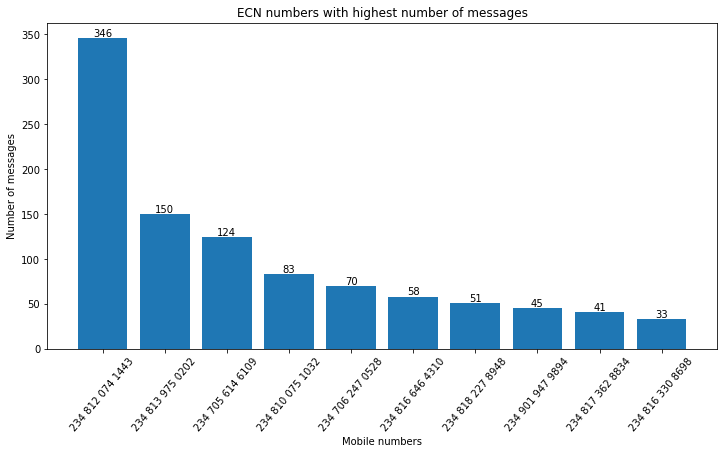

In [46]:
# Visualizing the data
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(viz1['phone_number'], viz1['message']);
plt.title('ECN numbers with highest number of messages');
plt.xlabel('Mobile numbers');
plt.ylabel('Number of messages');
plt.xticks(rotation=50)
for i in range(len(viz1['message'])):
    plt.annotate(str(viz1['message'][i]), xy = (viz1['phone_number'][i], viz1['message'][i]), ha ='center', va = 'bottom')


In [47]:
# grouping the date by number of chats
df5 = df_ecn.groupby('date')['message'].count()
df5 = pd.DataFrame(df5)
df5.sort_values('message', ascending = False, inplace = True)
df5.reset_index(inplace = True)
viz3 = df5.head(10)
viz3['date'] = viz3['date'].astype(str)
viz3

C:\Users\sodiq\AppData\Local\Temp/ipykernel_23792/1711882325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz3['date'] = viz3['date'].astype(str)


,date,message
0,2022-05-28,172
1,2021-12-22,169
2,2021-12-17,98
3,2022-06-30,79
4,2022-05-14,58
5,2022-07-10,58
6,2022-05-22,53
7,2022-07-05,53
8,2022-06-27,49
9,2022-07-19,43


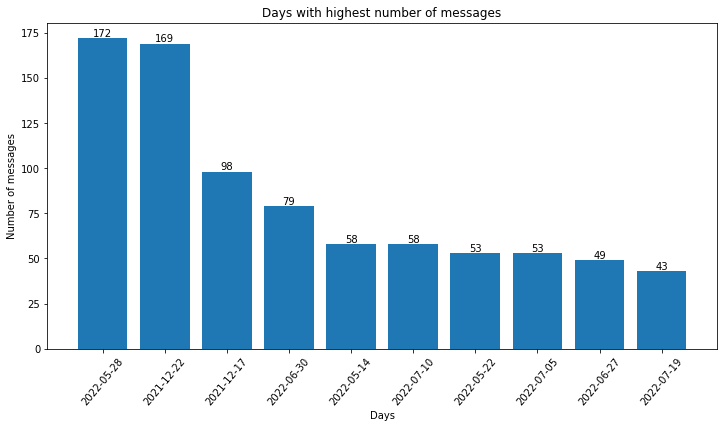

In [48]:
# visualizing the data
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(viz3['date'], viz3['message']);
plt.title('Days with highest number of messages');
plt.xlabel('Days');
plt.ylabel('Number of messages');
plt.xticks(rotation=50)
for i in range(len(viz3['message'])):
    plt.annotate(str(viz3['message'][i]), xy = (viz3['date'][i], viz3['message'][i]), ha ='center', va = 'bottom')


# Coclusion
* It can be deduced from the analysis that there are about 1169 messages from ECN 19 whatsapp group chat from 2021 till date
* The day that has the most message was on the 28th of May 2022 followed by 22nd of December 2021
* The phone number that has the highest chat on the group is 234 812 074 1443